In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
%matplotlib inline

In [13]:
snapfilename = '/project/projectdirs/desi/mocks/bgs/MXXL/snapshot/galaxy_catalogue_snapshot_55.hdf5'
f = h5py.File(snapfilename)

In [5]:
vel = f['Data/vel'][...]

In [6]:
pos = f['Data/pos'][...]

In [14]:
r_abs_mag = f['Data/abs_mag'][...]

In [15]:
f.close()

In [145]:
n_points = len(pos)

In [167]:
def get_mean_velocity(center_x, center_y, center_z):
    r = np.sqrt((pos[:,0]-center_x)**2 + (pos[:,1]-center_y)**2 + (pos[:,2]-center_z)**2)
    ii = r < 800.0
    vel_inside = vel[ii,:]
    r_center = r[ii] 
    r_abs_inside = r_abs_mag[ii]

    r_bins = np.arange(50,700,50)
    mean_vel_x = r_bins.copy()
    mean_vel_y = r_bins.copy()
    mean_vel_z = r_bins.copy()
    n_inside = r_bins.copy()

    for i in range(len(r_bins)):
        ii = (r_center < r_bins[i]) & (r_abs_inside < -20.0)
        n_inside[i] = np.count_nonzero(ii)
        mean_vel_x[i] = np.mean(vel_inside[ii,0])
        mean_vel_y[i] = np.mean(vel_inside[ii,1])
        mean_vel_z[i] = np.mean(vel_inside[ii,2])
    print('done with bin {}'.format(r_bins[i]))
    mean_vel =np.sqrt(mean_vel_x**2 + mean_vel_y**2 + mean_vel_z**2)

    return {'radius':r_bins, 'velocity':mean_vel}

In [168]:
def get_spheres(n_spheres=10):
    spheres = {}
    for i in range(n_spheres):
        center_x = center_y = center_z = 0.0
        while (center_x < 700) | (center_y < 700) | (center_z < 700):
            i_center = np.random.choice(np.arange(n_points//100))
            print(n_points, i_center)
            center_x = pos[i_center,0]
            center_y = pos[i_center,1]
            center_z = pos[i_center,2]
        print(i, center_x, center_y, center_z)
        spheres[i] = get_mean_velocity(center_x, center_y, center_z)
    return spheres

In [169]:
spheres = get_spheres(n_spheres=5)

729858655 692979
0 847.167 1916.93 2949.34
done with bin 650
729858655 3815288
1 2392.13 1214.79 1257.92
done with bin 650
729858655 7061084
2 799.642 868.771 2747.94
done with bin 650
729858655 5026431
729858655 4889508
729858655 3868732
729858655 1552519
729858655 4543765
729858655 3897768
3 1464.75 1917.85 2374.73
done with bin 650
729858655 4509000
4 1728.6 2174.9 1942.88
done with bin 650


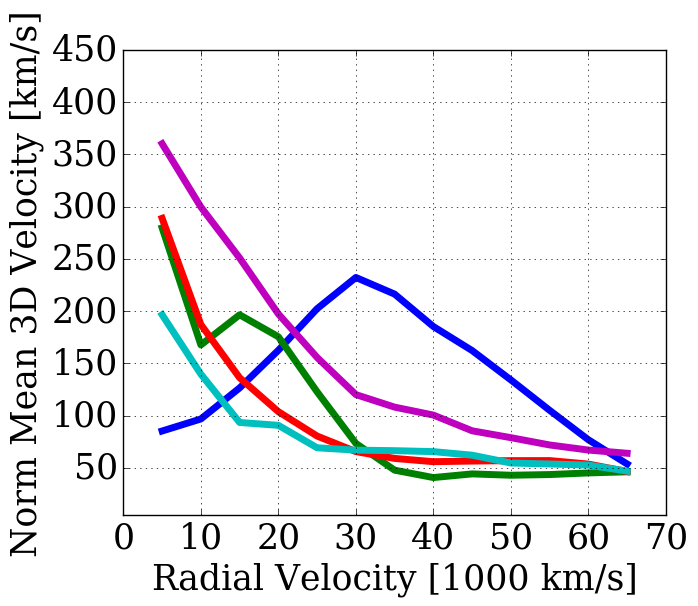

In [170]:
mean_vel =np.sqrt(mean_vel_x**2 + mean_vel_y**2 + mean_vel_z**2)
fig = plt.figure(1, figsize=(7,6))
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=25)

for i in range(5):
    sphere = spheres[i]
    plt.plot(sphere['radius']/10, sphere['velocity'], linewidth=5)
plt.ylim([5,450])
plt.xlim([0,70])
plt.grid()
plt.xlabel(r"Radial Velocity [1000 km/s]")
plt.ylabel(r"Norm Mean 3D Velocity [km/s]")
#plt.savefig('velocity_radius_sim.pdf', bbox_inches='tight')

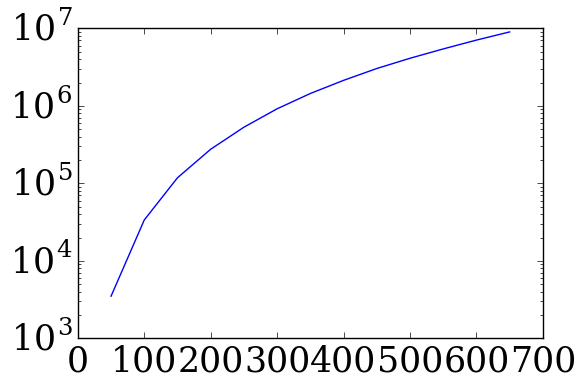

In [137]:
plt.plot(r_bins, n_inside)
plt.yscale('log')

In [65]:
norm_vel_3D = np.sqrt(vel[:,0]**2 + vel[:,1]**2 + vel[:,2]**2)

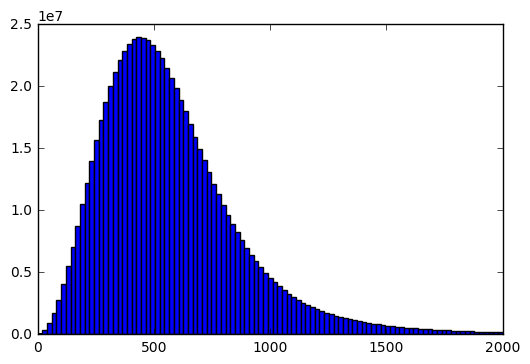

In [68]:
a= plt.hist(norm_vel_3D, bins=np.linspace(0,2000,100))